<IPython.core.display.Javascript object>


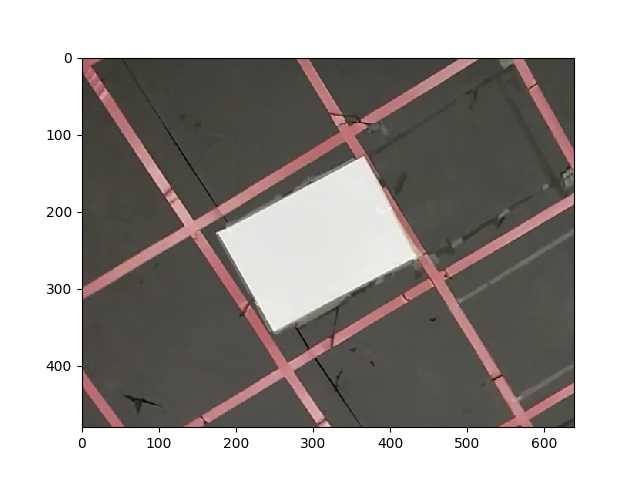

<IPython.core.display.Javascript object>


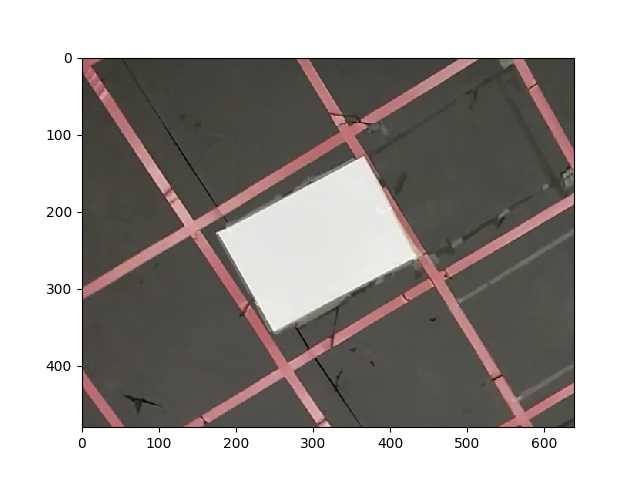

<IPython.core.display.Javascript object>


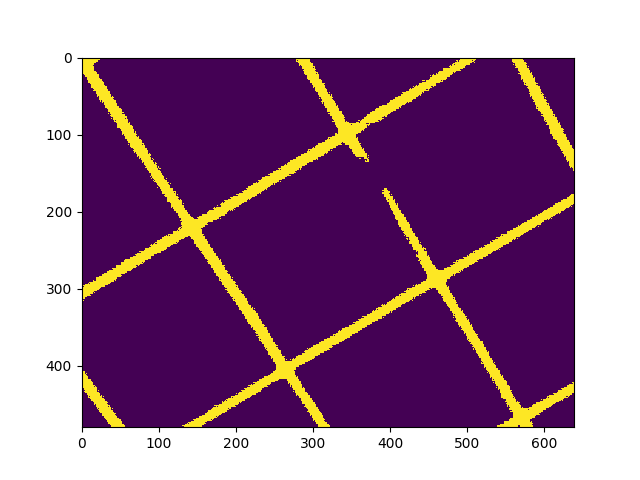

In [1]:
%matplotlib notebook

import cv2
import numpy as np
import matplotlib.pyplot as plt
import PyGridFinder as gr
from math import cos, sin
from timeit import default_timer as timer

# Documentation image: easy.mp4:322
video = cv2.VideoCapture("../Video/DroneCam-Spinning.mp4")
# video = cv2.VideoCapture("../Video/easy.mp4")
# video = cv2.VideoCapture("drone-images/%4d.bmp")
# for i in range(142):
# for i in range(235):
# for i in range(322):
for i in range(415):
    result, image = video.read()

# result, image = cv2.VideoCapture("../Images/TestWorstCase.png").read()
# result = True
# image = cv2.imread("drone-images/mask10.bmp")

def threshold(image):
     res = image.copy()
     h = image.shape[0]
     w = image.shape[1]
 
     # loop over the image, pixel by pixel
     for y in range(0, h):
         for x in range(0, w):
             # threshold the pixel
             res[y, x] = (255, 0, 0) if (image[y, x] == (255, 255, 255)).all() else (0, 0, 0)
 
     # return the thresholded image
     return res
    
# imageToMask = threshold(image)

assert(result)
# image = cv2.flip(image, 0)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

imageToMask = image

mask = gr.Mask(imageToMask)

lower_red1 = np.array([0, 30, 0])
upper_red1 = np.array([10, 255, 255])
mask1 = cv2.inRange(hsv, lower_red1, upper_red1)

lower_red2 = np.array([170, 30, 0])
upper_red2 = np.array([180, 255, 255])
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)

mask_py = mask1 | mask2
plt.figure(); plt.imshow(image)
plt.figure(); plt.imshow(imageToMask)
plt.figure(); plt.imshow(np.array(mask))
plt.show()


0.0005371469997044187
LineResult((310, 119), 15, 149°)
LineResult((310, 119), 15, 328°)
LineResult((160, 250), 14, 56°)
LineResult((565, 2), 13, 62°)
LineResult((634, 431), 13, 152°)
(140.383, 220.916)
(548.101, -29.7821)
(374.981, 568.723)
(758.036, 365.049)


<IPython.core.display.Javascript object>


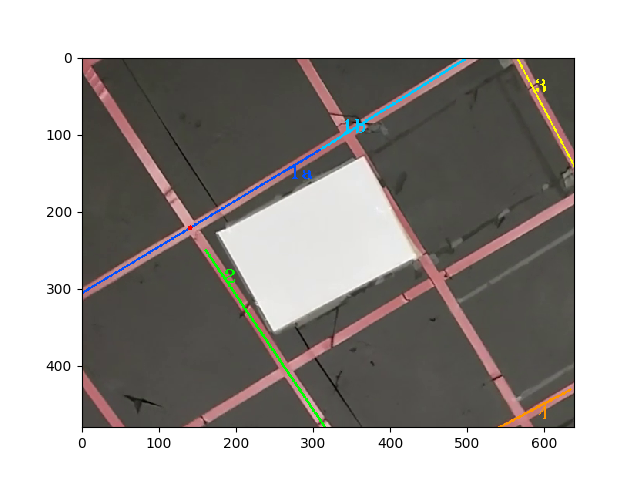

In [2]:
start = timer()
gf = gr.GridFinder(mask)
square = gf.findSquare()
end = timer()
time = end - start
print(time)

def showLine(line, color, name='', image=image):
    # print(line.getLineCenter())
    # print(line.getAngle())
    # print(line.getWidth())
    if line:
        print(line)
        p1 = (line.getLineCenter().x, line.getLineCenter().y)
        p2 = (line.getLineCenter().x + int(2 * 410 * cos(line.getAngle())), 
              line.getLineCenter().y + int(2 * 410 * sin(line.getAngle())))
        cv2.line(image, p1, p2, color, 2)
        font = cv2.FONT_HERSHEY_TRIPLEX
        xoffset = round (12*cos(line.getAngle()))
        yoffset = round (12*sin(line.getAngle()))
        xoffset += 16 if cos(line.getAngle()) > 0 else -32
        yoffset += 32 if sin(line.getAngle()) > 0 else -16
        cv2.putText(image, str(name), (line.getLineCenter().x + xoffset, line.getLineCenter().y + yoffset),
                    font, 0.8, color, 1, cv2.LINE_4)

showLine(square.lines[0], (0, 80, 255), '1a')
showLine(square.lines[1], (0, 200, 255), '1b')
showLine(square.lines[2], (0, 255, 0), '2')
showLine(square.lines[3], (255, 255, 0), '3')
showLine(square.lines[4], (255, 150, 0), '4')

for point in square.points:
    if point:
        print(point)
        point = (round(point.x), round(point.y))
        cv2.circle(image, point, 3, (255, 0, 0), -1)

plt.figure()
plt.imshow(image)
plt.show()
cv2.imwrite('out.png', cv2.cvtColor(image, cv2.COLOR_BGR2RGB));